# Broc95

Proyecto ETL, se desarrollo un proyecto de data, en el cúal se debe extraer, transformar y cargar, información de las principales universidades de Argentina, se utilizo airflow con el manejo de dags, la extracción se realizo sobre una base de datos postgres, la transformación y análisis se realizo con pandas, por otro lado la carga se realizo en un bucket de amazon S3.

# Dag factory grupo B


<img src=https://raw.githubusercontent.com/dipaolme/Skill-Up-DA-c-Python/grupoB/assets/dag-factory.png>

In [155]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np
import seaborn as sns
import requests 

In [104]:
import random
def hexAl():
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
#     print(color)
    return color[0]
def grafLocation(df):
    corrloc =df.groupby(df.location).count()
    c4=corrloc.university>5
    n =corrloc[c4]
    colores = [hexAl() for i in range(len(n))]
    corrloc[c4].university.plot(kind="bar", color = colores,fontsize=20)
    plt.title(f'Inscription by {df.location.name} > 5 in {df.university[0]}', fontsize=15)
    plt.show()
    ma= corrloc[c4]
    ma.index
    ma.max()
    f =ma.age == ma.age.max()
    name_L=ma[f].index[0]
    loca =df1.location == ma[f].index[0]
    grupoL =df1[loca]
    N = len(grupoL)
    colores = [hexAl() for i in range(N)]
    grupoL.university.groupby(grupoL.inscmonth).count().plot(kind="bar",color = colores,fontsize=20)
    plt.title(f'Inscription by {df.location.name} > 5 in {df.university[0]} by {df.inscmonth.name}', fontsize=15)
    plt.show()
    grafBar(grupoL.career, name_L)
    grafBar(grupoL.age, name_L)
    grafBox(grupoL.gender,grupoL.age, name_L)
    grafPie(grupoL,grupoL.age, name_L)
    grafPie(grupoL,grupoL.gender, name_L)
    grafPie(grupoL,grupoL.career, name_L)
    graf3Rel(grupoL,grupoL.career,grupoL.age,grupoL.gender)
    
    
    
def grafPie(dfD,dfg,location=""):
    total_precio = dfD.groupby(dfg).count()
    colors = sns.color_palette('pastel')[0:6]
    co = total_precio.columns[0]
    plt.pie(total_precio[co],labels=total_precio.index, colors = colors,
    autopct='%.0f%%')
    plt.title(f"Inscription by {dfg.name}: {location}")
    plt.show()

#     total_precio = dfD.groupby(dfg).count()
#     print(total_precio)
#     etiquetas = total_precio.index()
# #     print()
#     colors = sns.color_palette('pastel')[0:6]
#     plt.pie(total_precio, labels = etiquetas, colors = colors,
#     autopct='%.0f%%')
#     plt.title(f"Inscription by {dfg.name}: {location}")
#     plt.show()
 

    
def grafBar(data,location=""):
    fig = plt.figure(figsize = (10,5))
    plt.title(f"Inscription by {data.name}: {location}")
    sns.countplot(data, order = data.value_counts().index)
    plt.xticks(rotation=90)
    plt.show()


    
def graf3Rel(df,xd,yd,zd):
    
    sns.relplot(x=xd ,y=yd,hue=zd,data=df)
    plt.title(f"Inscription by {df.university.unique()[0]}")
    plt.xticks(rotation=90)
    plt.show()

    
def grafBox(var1,var2, location=""):
    plt.title(f"Inscription by {var1.name}:{var2.name}:{location}")
    sns.boxplot(x=var1,y=var2)
    plt.xticks(rotation=90)
    plt.show()
    
    
def url_todf(url):
    df = pd.read_html(url)
    df =df[0][1]
    df =df.str.split("\t")
    li =df.to_list()
    df1 = pd.DataFrame(li[1:],columns=li[0])
    return df1

In [105]:
url1 = "https://github.com/dipaolme/Skill-Up-DA-c-Python/blob/grupoB/datasets/GBUNComahue_process.txt"
url2 = "https://github.com/dipaolme/Skill-Up-DA-c-Python/blob/grupoB/datasets/GBUNSalvador_process.txt"

df1 = url_todf(url1)
df2 = url_todf(url2)



In [106]:
df2

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,universidad del salvador,licenciatura en ciencias de la computación,2020-09-01,carol,doyle,female,37,3254,colonia la blanquita,anthony88@gmail.com
1,universidad del salvador,licenciatura en ciencias antropológicas,2020-09-01,heidi,tran,female,27,8514,laguna del barro,todd44@hotmail.com
2,universidad del salvador,licenciatura en planificación y diseño del pai...,2020-09-01,rachael,harrington,female,23,7243,antonio carboni,zcantrell@yahoo.com
3,universidad del salvador,licenciatura en kinesiología y fisiatría,2020-09-01,ryan,silva,male,19,5272,comandante leal,heather60@gmail.com
4,universidad del salvador,ingeniería mecánica,2020-09-01,tiffany,knight,female,29,6533,alfredo demarchi,bwarner@gmail.com
...,...,...,...,...,...,...,...,...,...,...
1899,universidad del salvador,licenciatura en sociología,2021-02-01,melissa,mcclure,female,33,6339,cailomuta,rickey75@gmail.com
1900,universidad del salvador,ingeniería mecánica,2021-02-01,michael,moses,male,31,2703,cabo san fermin,laura79@hotmail.com
1901,universidad del salvador,licenciatura en kinesiología y fisiatría,2021-02-01,lisa,johnson,female,29,7637,la dulce,abigail27@yahoo.com
1902,universidad del salvador,licenciatura en producción de bioimagenes,2021-02-01,pamela,clark,female,19,1618,ricardo rojas,william03@hotmail.com


In [67]:
# data ="GBUNComahue_process.txt"

# df = pd.read_csv(data,sep="\t")


# df.career

In [107]:
dfg=pd.get_dummies(data=df1, columns=['gender'])

# dfk = pd.DataFrame(pd.date_range('2000-01-02', freq='1M', periods=15), columns=['Date'])
df1.inscription_date =pd.to_datetime(df1['inscription_date'], format='%Y-%m-%d')
bins_dt = pd.date_range('2020-08-01' , freq='1M', periods=7)
bins_str = bins_dt.astype(str).values
labels = ['{}'.format( bins_str[i]) for i in range(1, len(bins_str))]
df1['inscmonth']=pd.cut(df1.inscription_date,
                   bins=bins_dt,
                   labels=labels)

df1
dfg['inscmonth']=pd.cut(df1.inscription_date,
                   bins=bins_dt,
                   labels=labels)


dft=pd.get_dummies(data=df2, columns=['gender'])

# dfk = pd.DataFrame(pd.date_range('2000-01-02', freq='1M', periods=15), columns=['Date'])
df2.inscription_date =pd.to_datetime(df2['inscription_date'], format='%Y-%m-%d')
bins_dt = pd.date_range('2020-08-01' , freq='1M', periods=7)
bins_str = bins_dt.astype(str).values
labels = ['{}'.format( bins_str[i]) for i in range(1, len(bins_str))]
df2['inscmonth']=pd.cut(df2.inscription_date,
                   bins=bins_dt,
                   labels=labels)

df1
dft['inscmonth']=pd.cut(df2.inscription_date,
                   bins=bins_dt,
                   labels=labels)
df2

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email,inscmonth
0,universidad del salvador,licenciatura en ciencias de la computación,2020-09-01,carol,doyle,female,37,3254,colonia la blanquita,anthony88@gmail.com,2020-09-30
1,universidad del salvador,licenciatura en ciencias antropológicas,2020-09-01,heidi,tran,female,27,8514,laguna del barro,todd44@hotmail.com,2020-09-30
2,universidad del salvador,licenciatura en planificación y diseño del pai...,2020-09-01,rachael,harrington,female,23,7243,antonio carboni,zcantrell@yahoo.com,2020-09-30
3,universidad del salvador,licenciatura en kinesiología y fisiatría,2020-09-01,ryan,silva,male,19,5272,comandante leal,heather60@gmail.com,2020-09-30
4,universidad del salvador,ingeniería mecánica,2020-09-01,tiffany,knight,female,29,6533,alfredo demarchi,bwarner@gmail.com,2020-09-30
...,...,...,...,...,...,...,...,...,...,...,...
1899,universidad del salvador,licenciatura en sociología,2021-02-01,melissa,mcclure,female,33,6339,cailomuta,rickey75@gmail.com,2021-02-28
1900,universidad del salvador,ingeniería mecánica,2021-02-01,michael,moses,male,31,2703,cabo san fermin,laura79@hotmail.com,2021-02-28
1901,universidad del salvador,licenciatura en kinesiología y fisiatría,2021-02-01,lisa,johnson,female,29,7637,la dulce,abigail27@yahoo.com,2021-02-28
1902,universidad del salvador,licenciatura en producción de bioimagenes,2021-02-01,pamela,clark,female,19,1618,ricardo rojas,william03@hotmail.com,2021-02-28


In [108]:

# df3=pd.get_dummies(data=df1, columns=['career','gender','location'])

dfc=dfg.groupby(['career']).mean()
dfc=dfg.groupby(['career']).count()
dfa=dfg.groupby(['age']).count()
dfl=dfg.groupby(['location']).mean()
dfI=dfg.groupby(['inscription_date']).mean()

dfcp = df1.groupby(df1.postal_code).count()

dfc

dfc =dfg.university.groupby(df1.career).count()
# dfc

In [114]:
# dfcg  =df1.university.groupby([df1.career,df1.gender,df1.age]).count().plot(kind="bar")

df1.age = df1.age.astype(int)
df2.age = df2.age.astype(int)

In [113]:
df1.dtypes

university                  object
career                      object
inscription_date    datetime64[ns]
first_name                  object
last_name                   object
gender                      object
age                          int32
postal_code                 object
location                    object
email                       object
inscmonth                 category
dtype: object

# General
## Comportamiento por universidad

Grafícas de barras, pie, relación a 3 variables , para cada universidad 


# Univerdidad Grupo B Comahue

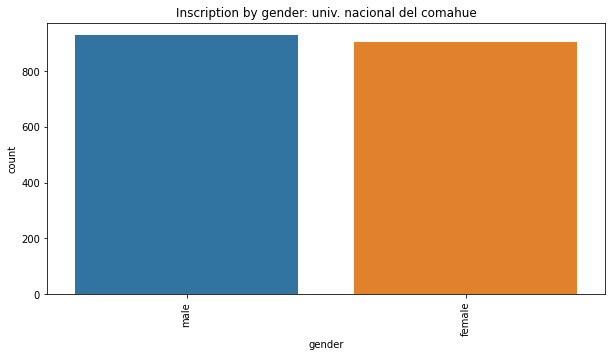

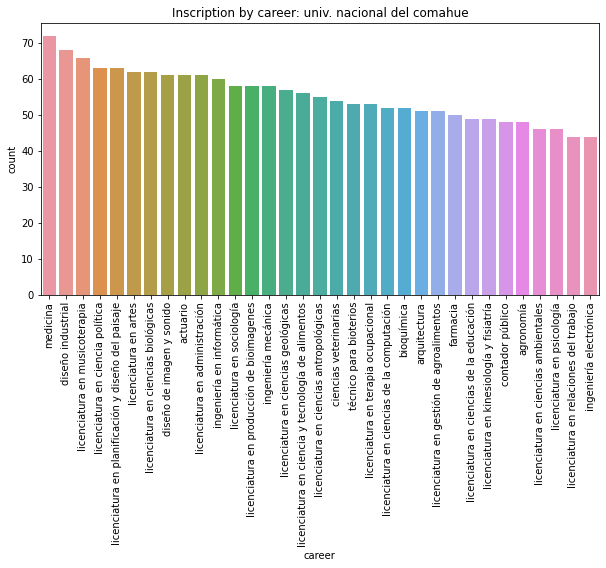

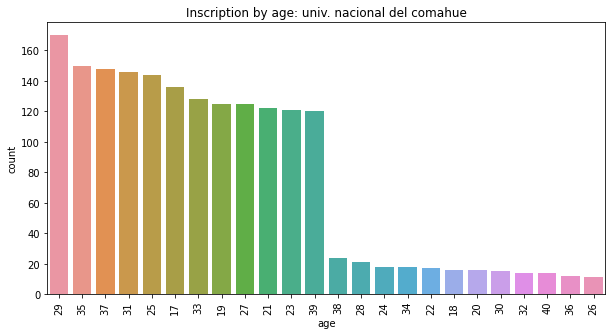

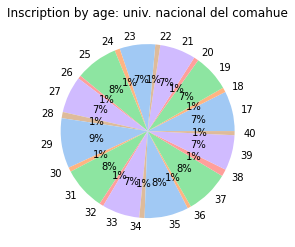

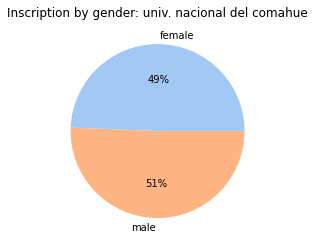

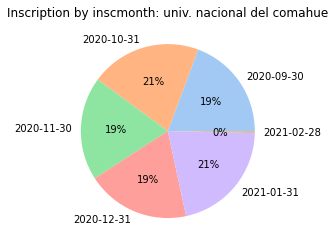

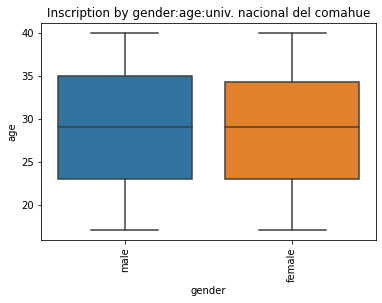

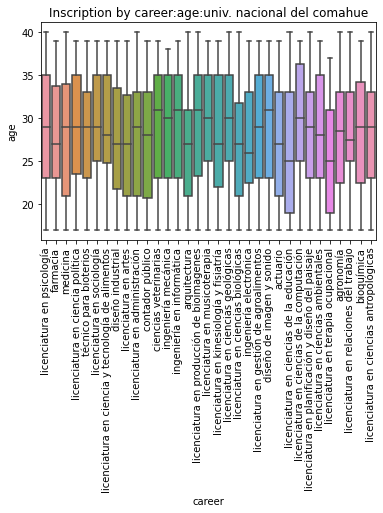

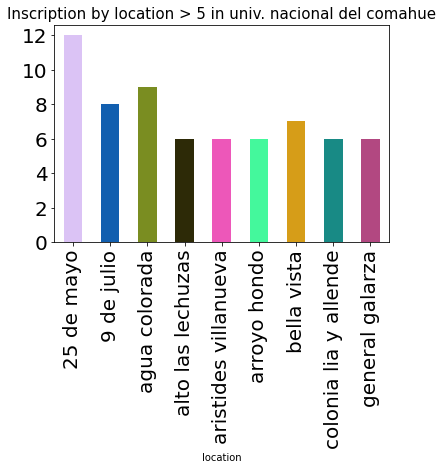

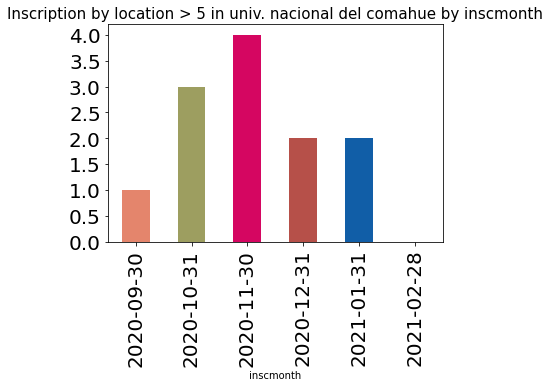

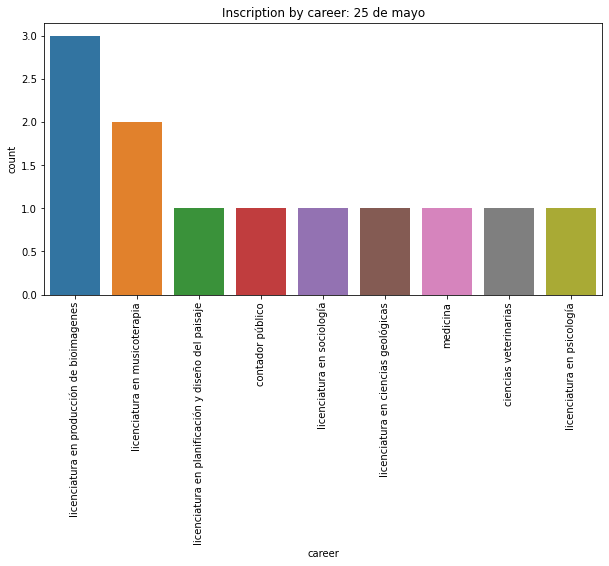

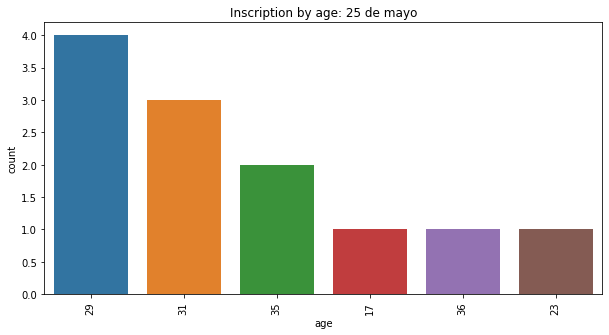

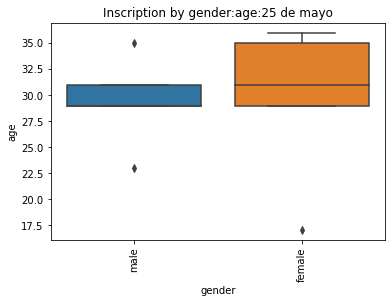

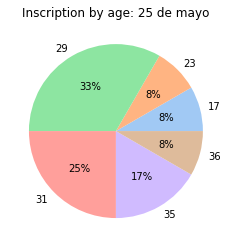

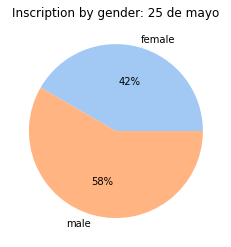

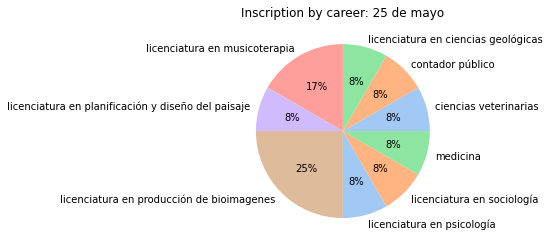

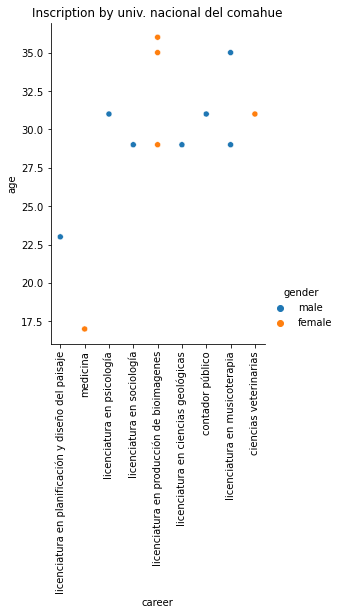

In [153]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#  Bar
grafBar(df1.gender,df1.university[0])
grafBar(df1.career,df1.university[0])
grafBar(df1.age,df1.university[0])
#  Pie
grafPie(df1,df1.age,df1.university[0])
grafPie(df1,df1.gender,df1.university[0])
grafPie(df1,df1.inscmonth,df1.university[0])
# Box
grafBox(df1.gender,df1.age,df1.university[0])
grafBox(df1.career,df1.age,df1.university[0])

#  Location 
grafLocation(df1)

# Universidad Grupo B salvador


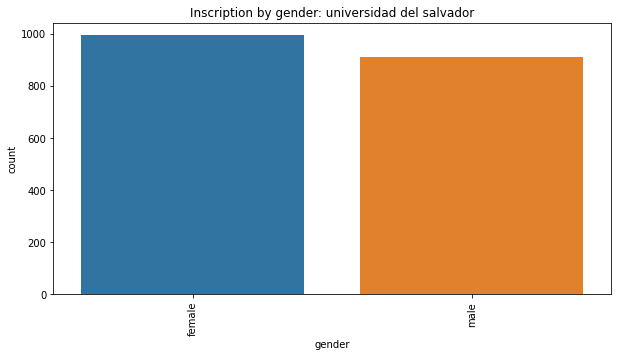

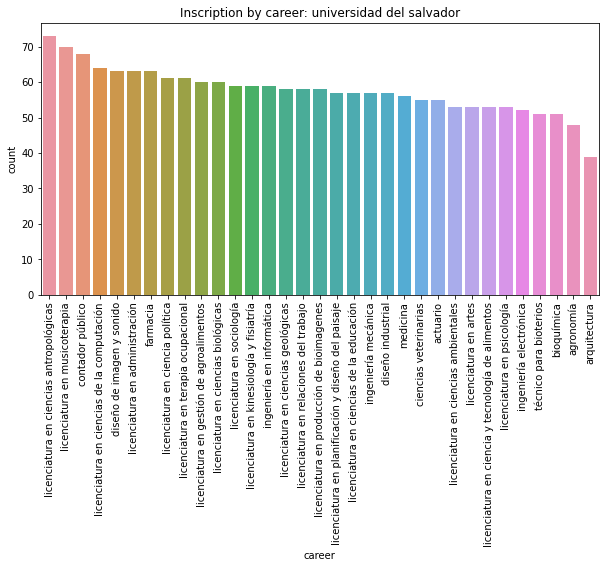

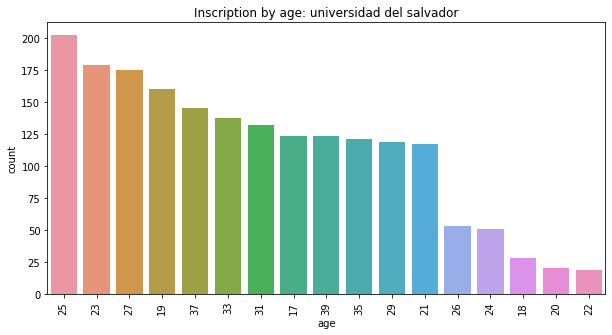

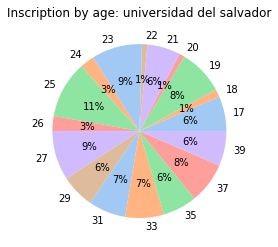

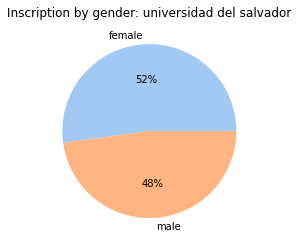

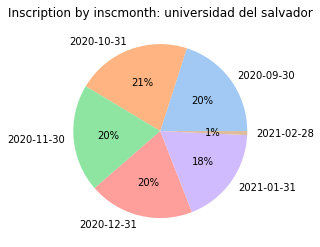

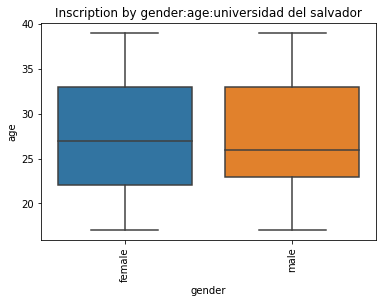

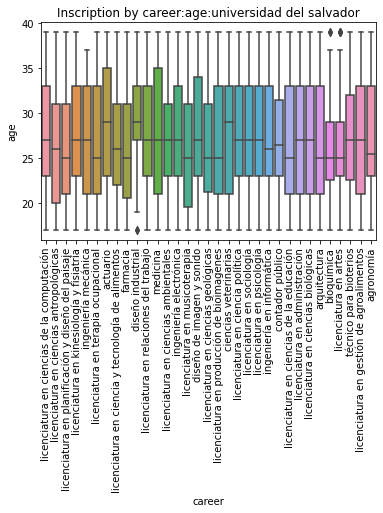

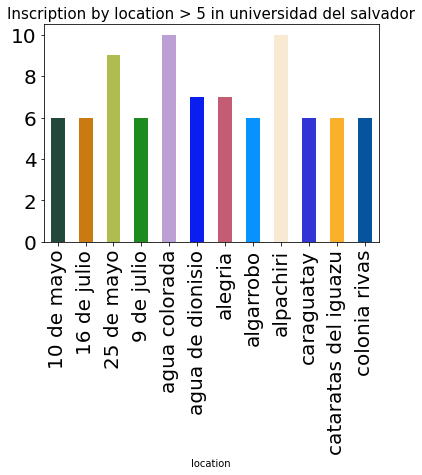

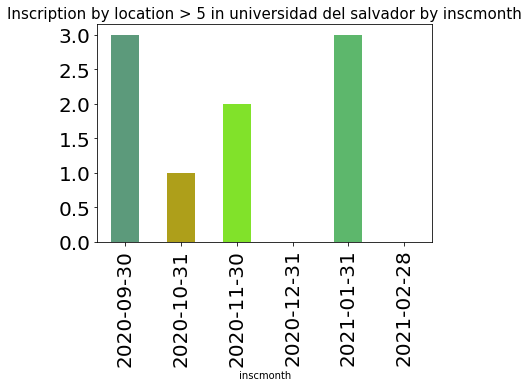

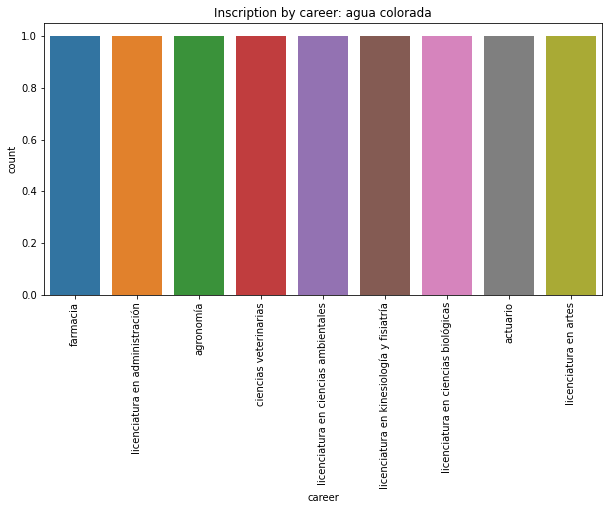

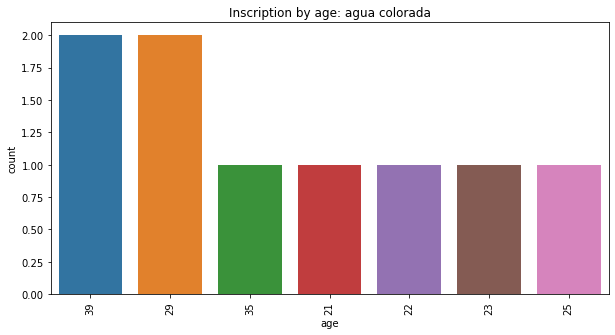

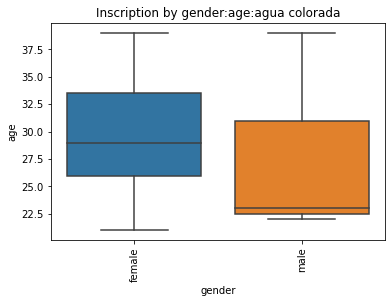

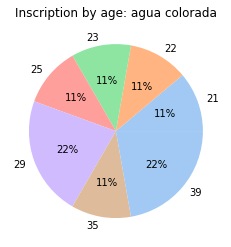

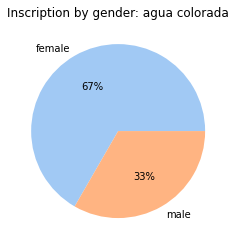

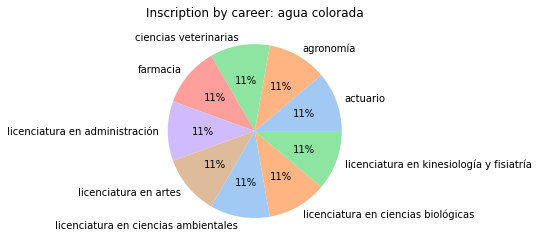

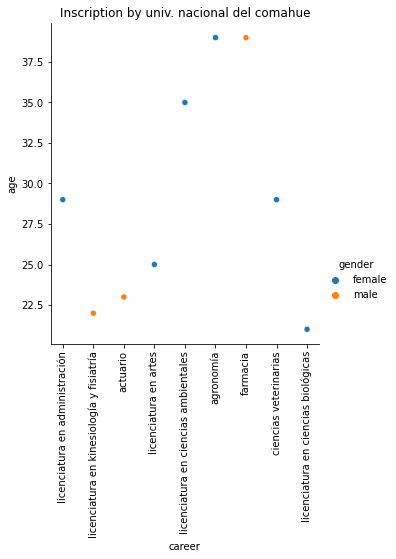

In [115]:
#  Bar
grafBar(df2.gender,df2.university[0])
grafBar(df2.career,df2.university[0])
grafBar(df2.age,df2.university[0])
#  Pie
grafPie(df2,df2.age,df2.university[0])
grafPie(df2,df2.gender,df2.university[0])
grafPie(df2,df2.inscmonth,df2.university[0])
# Box
grafBox(df2.gender,df2.age,df2.university[0])
grafBox(df2.career,df2.age,df2.university[0])

#  Location 
grafLocation(df2)


In [117]:
dfg1=pd.get_dummies(data=dfg, columns=['career'])
dft2=pd.get_dummies(data=dft, columns=['career'])

In [118]:
# dfg1

In [119]:
# dft2

In [120]:
correlacion1 = dfg1.corr()
# correlacion
correlacion1

,gender_female,gender_male,career_actuario,career_agronomía,career_arquitectura,career_bioquímica,career_ciencias veterinarias,career_contador público,career_diseño de imagen y sonido,career_diseño industrial,...,career_licenciatura en kinesiología y fisiatría,career_licenciatura en musicoterapia,career_licenciatura en planificación y diseño del paisaje,career_licenciatura en producción de bioimagenes,career_licenciatura en psicología,career_licenciatura en relaciones del trabajo,career_licenciatura en sociología,career_licenciatura en terapia ocupacional,career_medicina,career_técnico para bioterios
gender_female,1.000000,-1.000000,0.023637,-0.025287,0.018723,0.021876,0.002190,-0.011613,-0.025060,0.019797,...,-0.001301,0.014150,0.011361,0.045933,0.002017,0.037637,-0.022677,-0.020636,0.002542,0.031490
gender_male,-1.000000,1.000000,-0.023637,0.025287,-0.018723,-0.021876,-0.002190,0.011613,0.025060,-0.019797,...,0.001301,-0.014150,-0.011361,-0.045933,-0.002017,-0.037637,0.022677,0.020636,-0.002542,-0.031490
career_actuario,0.023637,-0.023637,1.000000,-0.030460,-0.031423,-0.031739,-0.032362,-0.030460,-0.034463,-0.036459,...,-0.030784,-0.035899,-0.035043,-0.033577,-0.029801,-0.029130,-0.033577,-0.032052,-0.037559,-0.032052
career_agronomía,-0.025287,0.025287,-0.030460,1.000000,-0.027773,-0.028052,-0.028602,-0.026921,-0.030460,-0.032224,...,-0.027208,-0.031728,-0.030972,-0.029676,-0.026339,-0.025746,-0.029676,-0.028328,-0.033195,-0.028328
career_arquitectura,0.018723,-0.018723,-0.031423,-0.027773,1.000000,-0.028939,-0.029507,-0.027773,-0.031423,-0.033243,...,-0.028069,-0.032732,-0.031952,-0.030615,-0.027173,-0.026561,-0.030615,-0.029225,-0.034246,-0.029225
career_bioquímica,0.021876,-0.021876,-0.031739,-0.028052,-0.028939,1.000000,-0.029803,-0.028052,-0.031739,-0.033577,...,-0.028350,-0.033061,-0.032273,-0.030922,-0.027446,-0.026827,-0.030922,-0.029518,-0.034590,-0.029518
career_ciencias veterinarias,0.002190,-0.002190,-0.032362,-0.028602,-0.029507,-0.029803,1.000000,-0.028602,-0.032362,-0.034236,...,-0.028907,-0.033710,-0.032907,-0.031529,-0.027984,-0.027354,-0.031529,-0.030097,-0.035268,-0.030097
career_contador público,-0.011613,0.011613,-0.030460,-0.026921,-0.027773,-0.028052,-0.028602,1.000000,-0.030460,-0.032224,...,-0.027208,-0.031728,-0.030972,-0.029676,-0.026339,-0.025746,-0.029676,-0.028328,-0.033195,-0.028328
career_diseño de imagen y sonido,-0.025060,0.025060,-0.034463,-0.030460,-0.031423,-0.031739,-0.032362,-0.030460,1.000000,-0.036459,...,-0.030784,-0.035899,-0.035043,-0.033577,-0.029801,-0.029130,-0.033577,-0.032052,-0.037559,-0.032052
career_diseño industrial,0.019797,-0.019797,-0.036459,-0.032224,-0.033243,-0.033577,-0.034236,-0.032224,-0.036459,1.000000,...,-0.032567,-0.037978,-0.037073,-0.035521,-0.031527,-0.030817,-0.035521,-0.033908,-0.039734,-0.033908


In [122]:
correlacion2 = dft2.corr()
# correlacion
correlacion2
# sns.heatmap(correlacion[0:5],xticklabels=correlacion.columns[0:5],yticklabels=correlacion.columns[0:5],annot=True)
# plt.show()

,gender_female,gender_male,career_actuario,career_agronomía,career_arquitectura,career_bioquímica,career_ciencias veterinarias,career_contador público,career_diseño de imagen y sonido,career_diseño industrial,...,career_licenciatura en kinesiología y fisiatría,career_licenciatura en musicoterapia,career_licenciatura en planificación y diseño del paisaje,career_licenciatura en producción de bioimagenes,career_licenciatura en psicología,career_licenciatura en relaciones del trabajo,career_licenciatura en sociología,career_licenciatura en terapia ocupacional,career_medicina,career_técnico para bioterios
gender_female,1.000000,-1.000000,0.064756,0.019895,-0.032213,0.002616,0.027091,-0.025293,-0.016791,0.007851,...,0.019595,-0.014009,0.044869,0.022949,-0.004099,-0.007641,0.025663,0.001113,-0.007504,0.028664
gender_male,-1.000000,1.000000,-0.064756,-0.019895,0.032213,-0.002616,-0.027091,0.025293,0.016791,-0.007851,...,-0.019595,0.014009,-0.044869,-0.022949,0.004099,0.007641,-0.025663,-0.001113,0.007504,-0.028664
career_actuario,0.064756,-0.064756,1.000000,-0.027736,-0.024941,-0.028613,-0.029746,-0.033192,-0.031905,-0.030298,...,-0.030842,-0.033695,-0.030298,-0.030571,-0.029184,-0.030571,-0.030842,-0.031377,-0.030023,-0.028613
career_agronomía,0.019895,-0.019895,-0.027736,1.000000,-0.023255,-0.026680,-0.027736,-0.030949,-0.029749,-0.028251,...,-0.028758,-0.031418,-0.028251,-0.028506,-0.027212,-0.028506,-0.028758,-0.029257,-0.027995,-0.026680
career_arquitectura,-0.032213,0.032213,-0.024941,-0.023255,1.000000,-0.023991,-0.024941,-0.027830,-0.026751,-0.025404,...,-0.025860,-0.028252,-0.025404,-0.025633,-0.024470,-0.025633,-0.025860,-0.026308,-0.025173,-0.023991
career_bioquímica,0.002616,-0.002616,-0.028613,-0.026680,-0.023991,1.000000,-0.028613,-0.031928,-0.030690,-0.029144,...,-0.029667,-0.032411,-0.029144,-0.029407,-0.028073,-0.029407,-0.029667,-0.030182,-0.028880,-0.027523
career_ciencias veterinarias,0.027091,-0.027091,-0.029746,-0.027736,-0.024941,-0.028613,1.000000,-0.033192,-0.031905,-0.030298,...,-0.030842,-0.033695,-0.030298,-0.030571,-0.029184,-0.030571,-0.030842,-0.031377,-0.030023,-0.028613
career_contador público,-0.025293,0.025293,-0.033192,-0.030949,-0.027830,-0.031928,-0.033192,1.000000,-0.035601,-0.033808,...,-0.034415,-0.037598,-0.033808,-0.034113,-0.032565,-0.034113,-0.034415,-0.035012,-0.033501,-0.031928
career_diseño de imagen y sonido,-0.016791,0.016791,-0.031905,-0.029749,-0.026751,-0.030690,-0.031905,-0.035601,1.000000,-0.032497,...,-0.033080,-0.036140,-0.032497,-0.032790,-0.031302,-0.032790,-0.033080,-0.033655,-0.032202,-0.030690
career_diseño industrial,0.007851,-0.007851,-0.030298,-0.028251,-0.025404,-0.029144,-0.030298,-0.033808,-0.032497,1.000000,...,-0.031415,-0.034320,-0.030861,-0.031139,-0.029726,-0.031139,-0.031415,-0.031960,-0.030581,-0.029144


In [123]:
correlacion2[0:5]

,gender_female,gender_male,career_actuario,career_agronomía,career_arquitectura,career_bioquímica,career_ciencias veterinarias,career_contador público,career_diseño de imagen y sonido,career_diseño industrial,...,career_licenciatura en kinesiología y fisiatría,career_licenciatura en musicoterapia,career_licenciatura en planificación y diseño del paisaje,career_licenciatura en producción de bioimagenes,career_licenciatura en psicología,career_licenciatura en relaciones del trabajo,career_licenciatura en sociología,career_licenciatura en terapia ocupacional,career_medicina,career_técnico para bioterios
gender_female,1.000000,-1.000000,0.064756,0.019895,-0.032213,0.002616,0.027091,-0.025293,-0.016791,0.007851,...,0.019595,-0.014009,0.044869,0.022949,-0.004099,-0.007641,0.025663,0.001113,-0.007504,0.028664
gender_male,-1.000000,1.000000,-0.064756,-0.019895,0.032213,-0.002616,-0.027091,0.025293,0.016791,-0.007851,...,-0.019595,0.014009,-0.044869,-0.022949,0.004099,0.007641,-0.025663,-0.001113,0.007504,-0.028664
career_actuario,0.064756,-0.064756,1.000000,-0.027736,-0.024941,-0.028613,-0.029746,-0.033192,-0.031905,-0.030298,...,-0.030842,-0.033695,-0.030298,-0.030571,-0.029184,-0.030571,-0.030842,-0.031377,-0.030023,-0.028613
career_agronomía,0.019895,-0.019895,-0.027736,1.000000,-0.023255,-0.026680,-0.027736,-0.030949,-0.029749,-0.028251,...,-0.028758,-0.031418,-0.028251,-0.028506,-0.027212,-0.028506,-0.028758,-0.029257,-0.027995,-0.026680
career_arquitectura,-0.032213,0.032213,-0.024941,-0.023255,1.000000,-0.023991,-0.024941,-0.027830,-0.026751,-0.025404,...,-0.025860,-0.028252,-0.025404,-0.025633,-0.024470,-0.025633,-0.025860,-0.026308,-0.025173,-0.023991


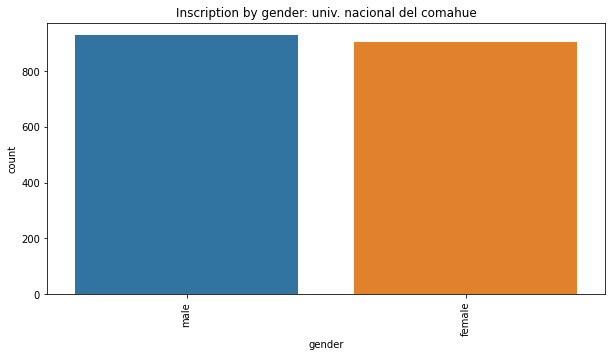

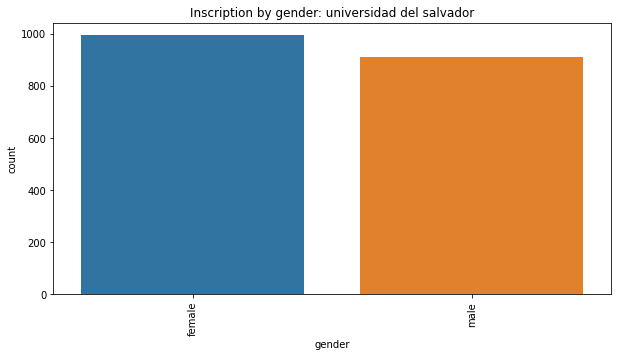

In [124]:
grafBar(df1.gender,df1.university[0])
grafBar(df2.gender,df2.university[0])

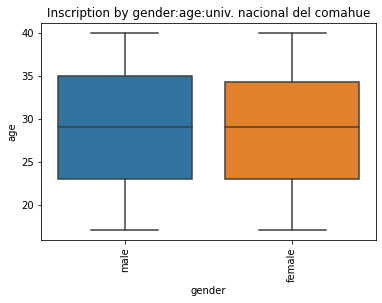

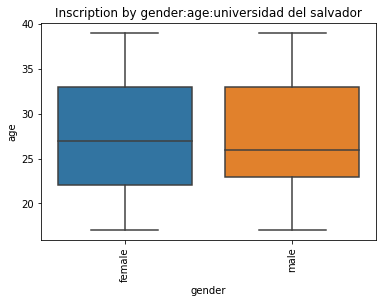

In [125]:
grafBox(df1.gender,df1.age,df1.university[0])
grafBox(df2.gender,df2.age,df2.university[0])

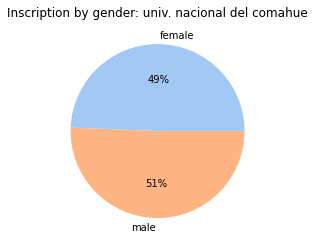

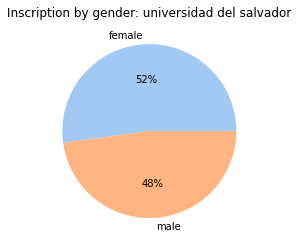

In [126]:
grafPie(df1,df1.gender,df1.university[0])
grafPie(df2,df2.gender,df2.university[0])





In [127]:
# total_precio = df2.groupby(df2.gender).count()
# print(total_precio)
# #     etiquetas = dfg.unique()
# # l=list(total_precio['university'].index.sort_values())
# label =total_precio['age'].sort_values()

# label.index
# total_precio.age
# # total_precio['age'].index


In [ ]:
total_precio = df1.groupby(df1.gender).count()

colors = sns.color_palette('pastel')[0:6]
# plt.pie(total_precio.columns[0],labels=total_precio.index, colors = colors,
# autopct='%.0f%%')
# # plt.title(f"Inscription by {dfg.name}: {location}")
# plt.show()

In [ ]:
total_precio.columns[0]


In [129]:
904/len(df1)*100

df1.gender.unique()

array(['male', 'female'], dtype=object)

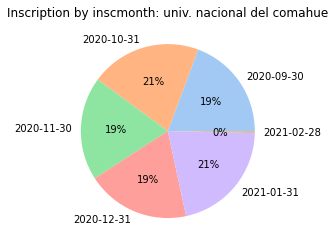

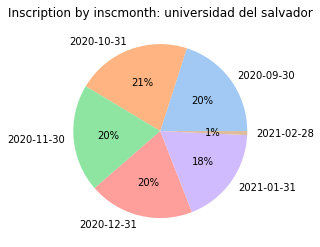

In [130]:
grafPie(df1,df1.inscmonth,df1.university[0])
grafPie(df2,df2.inscmonth,df2.university[0])

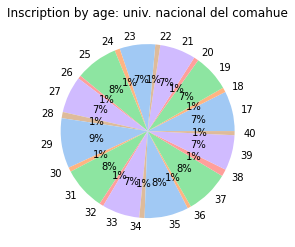

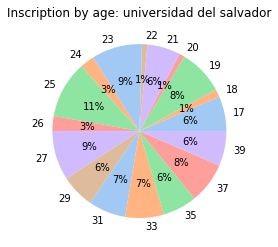

In [131]:
grafPie(df1,df1.age,df1.university[0])
grafPie(df2,df2.age,df2.university[0])

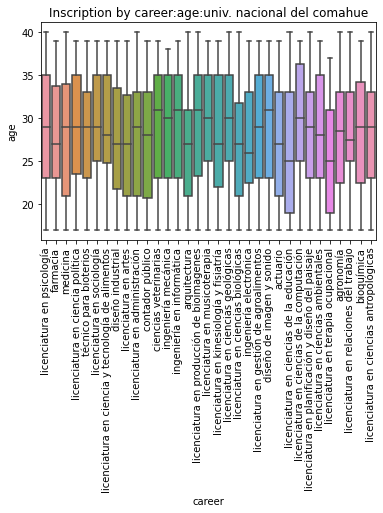

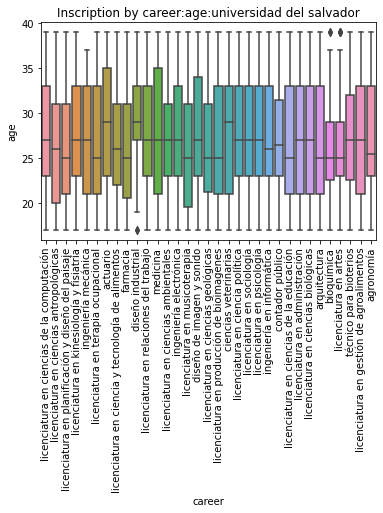

In [132]:
grafBox(df1.career,df1.age,df1.university[0])
grafBox(df2.career,df2.age,df2.university[0])


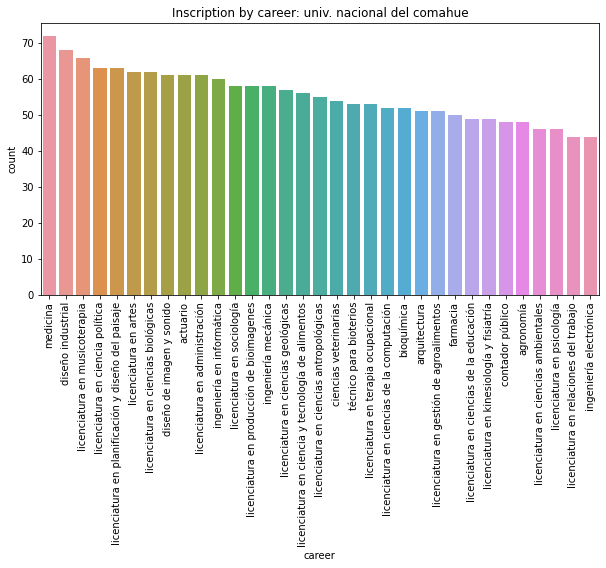

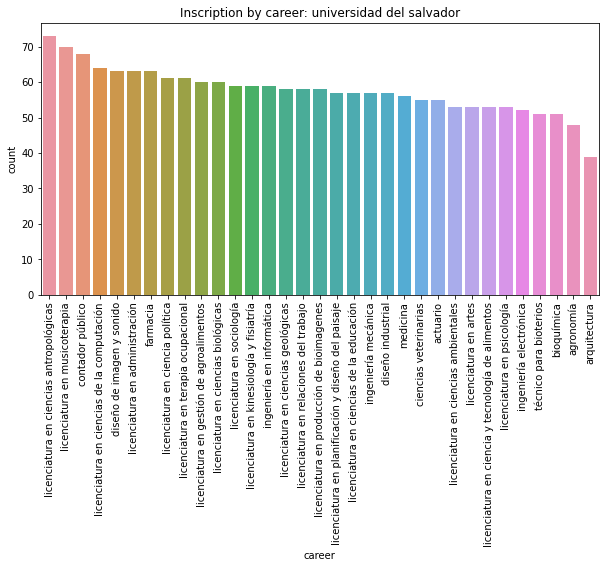

In [133]:
grafBar(df1.career,df1.university[0])
grafBar(df2.career,df2.university[0])

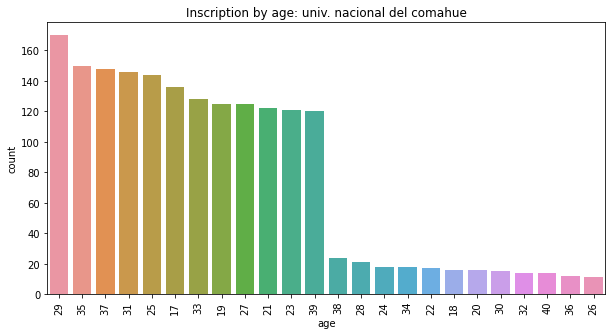

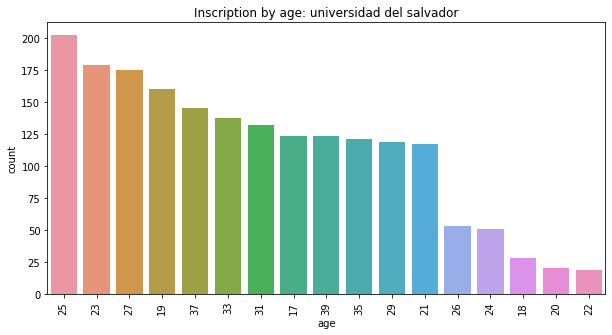

In [134]:
grafBar(df1.age,df1.university[0])
grafBar(df2.age,df2.university[0])

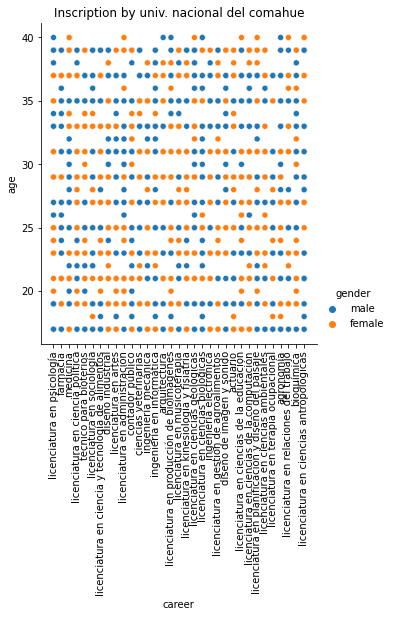

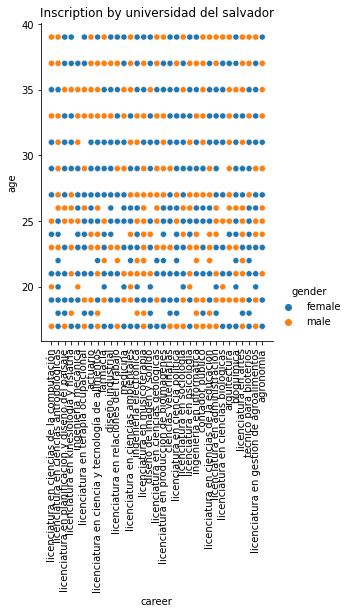

In [135]:
graf3Rel(df1,df1.career,df1.age,df1.gender)
graf3Rel(df2,df2.career,df2.age,df2.gender)

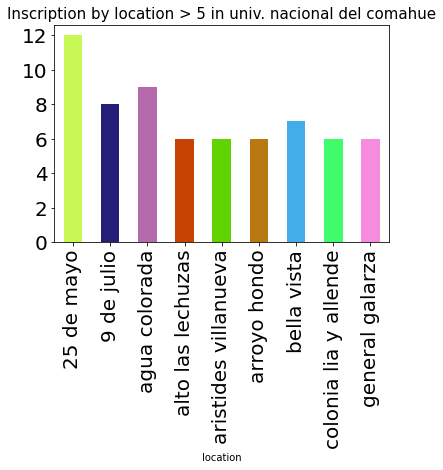

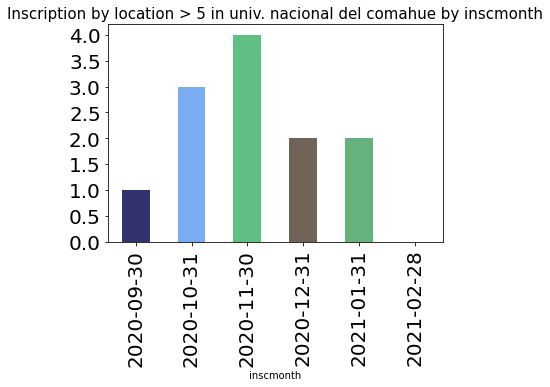

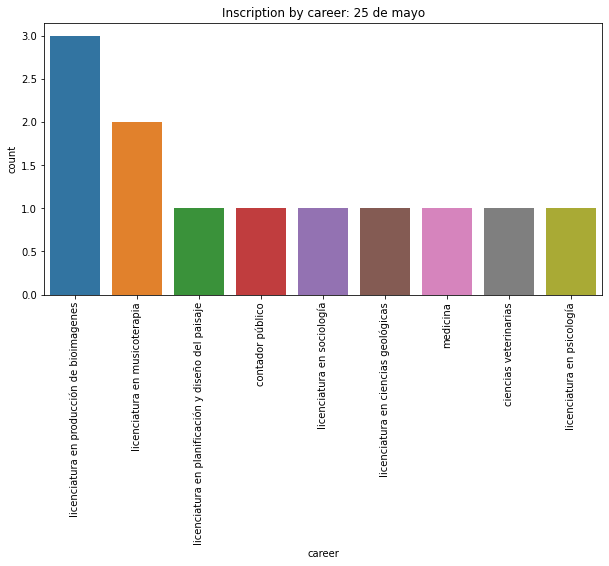

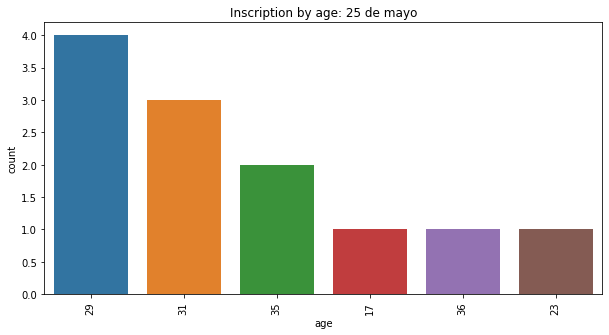

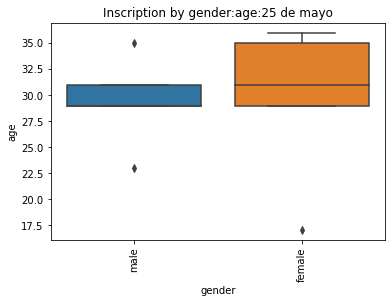

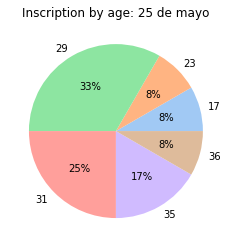

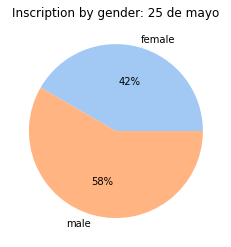

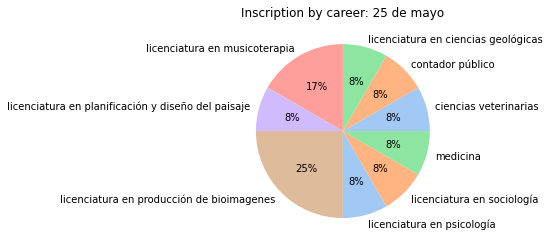

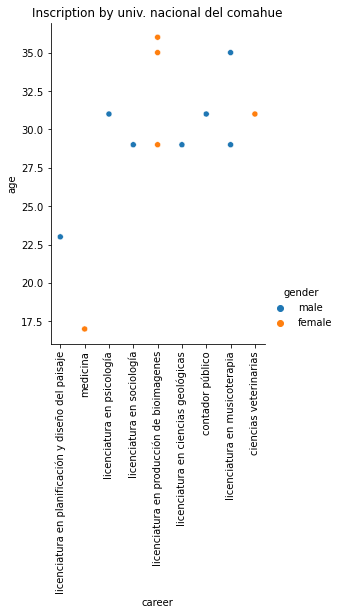

In [136]:
grafLocation(df1)




In [137]:
df1.university.unique()[0]

'univ. nacional del comahue'

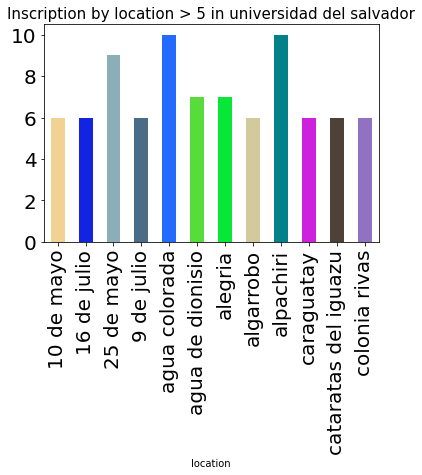

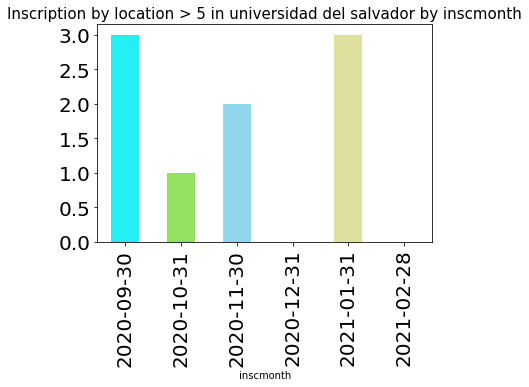

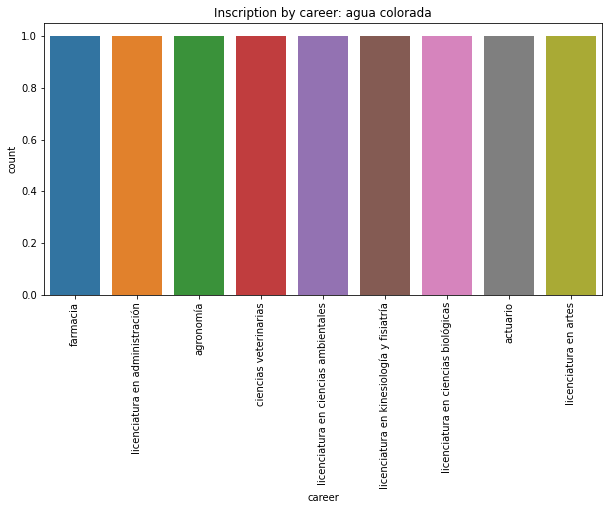

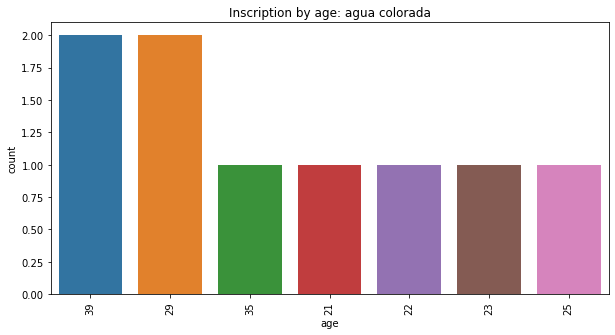

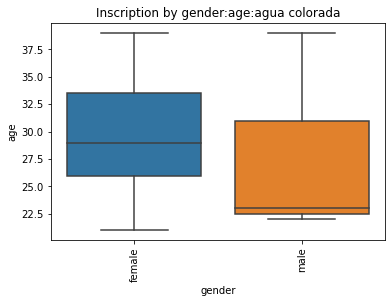

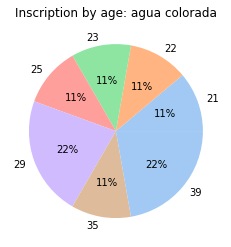

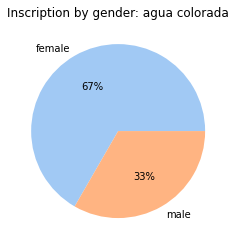

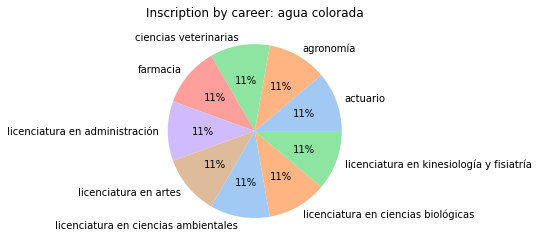

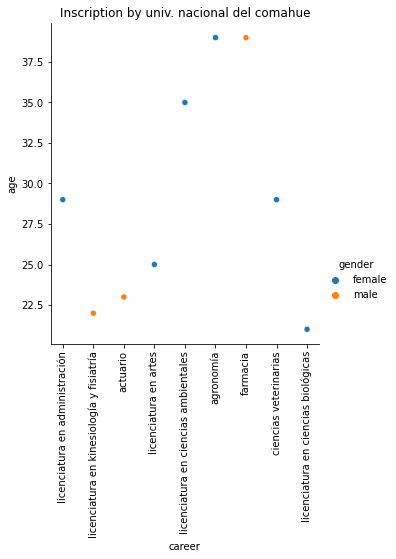

In [138]:
grafLocation(df2)

In [139]:
dfg1.describe()

,gender_female,gender_male,career_actuario,career_agronomía,career_arquitectura,career_bioquímica,career_ciencias veterinarias,career_contador público,career_diseño de imagen y sonido,career_diseño industrial,...,career_licenciatura en kinesiología y fisiatría,career_licenciatura en musicoterapia,career_licenciatura en planificación y diseño del paisaje,career_licenciatura en producción de bioimagenes,career_licenciatura en psicología,career_licenciatura en relaciones del trabajo,career_licenciatura en sociología,career_licenciatura en terapia ocupacional,career_medicina,career_técnico para bioterios
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,...,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,0.493719,0.506281,0.033315,0.026215,0.027854,0.028400,0.029492,0.026215,0.033315,0.037138,...,0.026761,0.036046,0.034407,0.031677,0.025123,0.024031,0.031677,0.028946,0.039323,0.028946
std,0.500097,0.500097,0.179507,0.159818,0.164598,0.166157,0.169227,0.159818,0.179507,0.189152,...,0.161429,0.186455,0.182323,0.175186,0.156541,0.153186,0.175186,0.167700,0.194415,0.167700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
dft2.describe()

,gender_female,gender_male,career_actuario,career_agronomía,career_arquitectura,career_bioquímica,career_ciencias veterinarias,career_contador público,career_diseño de imagen y sonido,career_diseño industrial,...,career_licenciatura en kinesiología y fisiatría,career_licenciatura en musicoterapia,career_licenciatura en planificación y diseño del paisaje,career_licenciatura en producción de bioimagenes,career_licenciatura en psicología,career_licenciatura en relaciones del trabajo,career_licenciatura en sociología,career_licenciatura en terapia ocupacional,career_medicina,career_técnico para bioterios
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,...,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,0.521534,0.478466,0.028887,0.025210,0.020483,0.026786,0.028887,0.035714,0.033088,0.029937,...,0.030987,0.036765,0.029937,0.030462,0.027836,0.030462,0.030987,0.032038,0.029412,0.026786
std,0.499667,0.499667,0.167532,0.156804,0.141683,0.161499,0.167532,0.185626,0.178914,0.170458,...,0.173329,0.188233,0.170458,0.171900,0.164546,0.171900,0.173329,0.176147,0.169002,0.161499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
df1.career.groupby([df1.career,df1.age,df1.gender]).describe()




count unique                     top freq
career                 age gender                                          
actuario               17  female     4      1                actuario    4
                           male       2      1                actuario    2
                       18  female     1      1                actuario    1
                       19  female     2      1                actuario    2
                           male       4      1                actuario    4
...                                 ...    ...                     ...  ...
técnico para bioterios 35  female     2      1  técnico para bioterios    2
                           male       3      1  técnico para bioterios    3
                       37  female     1      1  técnico para bioterios    1
                           male       2      1  técnico para bioterios    2
                       39  female     2      1  técnico para bioterios    2

[863 rows x 4 columns]

In [142]:
df2.career.groupby([df2.career,df2.age,df2.gender]).describe()

count unique                     top freq
career                 age gender                                          
actuario               17  female     5      1                actuario    5
                       18  female     1      1                actuario    1
                       19  female     1      1                actuario    1
                           male       1      1                actuario    1
                       21  female     1      1                actuario    1
...                                 ...    ...                     ...  ...
técnico para bioterios 33  female     2      1  técnico para bioterios    2
                           male       1      1  técnico para bioterios    1
                       35  female     3      1  técnico para bioterios    3
                       37  male       5      1  técnico para bioterios    5
                       39  male       2      1  técnico para bioterios    2

[819 rows x 4 columns]

In [143]:
dif = len(df2)-len(df1)
dif

73

In [144]:
dif/len(df2)*100

3.8340336134453783

In [145]:
ma=df1.university.groupby(df1.age).describe()

# dat['count'].unique()
f =ma['count'] == ma['count'].max()
name_L=ma[f].index[0]
# loca =df1.location == ma[f].index[0]
name_L
ma
print(df1.university[0])
print(name_L, ma['count'].max())


univ. nacional del comahue
29 170


In [146]:
ma

,count,unique,top,freq
age,,,,
17,136,1,univ. nacional del comahue,136
18,16,1,univ. nacional del comahue,16
19,125,1,univ. nacional del comahue,125
20,16,1,univ. nacional del comahue,16
21,122,1,univ. nacional del comahue,122
22,17,1,univ. nacional del comahue,17
23,121,1,univ. nacional del comahue,121
24,18,1,univ. nacional del comahue,18
25,144,1,univ. nacional del comahue,144


In [147]:
EdT1=ma.sum()
ma
ma[ma.index > 27].sum()
ma[ma.index > 27].sum()[0]/ma.sum()[0]*100

# len(df1)


53.52266521026762

In [148]:
ma=df2.university.groupby(df2.age).describe()

# dat['count'].unique()
f =ma['count'] == ma['count'].max()
name_L=ma[f].index[0]
# loca =df1.location == ma[f].index[0]
name_L
print(df2.university[0])
print(name_L, ma['count'].max())

universidad del salvador
25 202


In [149]:
EdadT2=ma.sum()
ma

,count,unique,top,freq
age,,,,
17,123,1,universidad del salvador,123
18,28,1,universidad del salvador,28
19,160,1,universidad del salvador,160
20,20,1,universidad del salvador,20
21,117,1,universidad del salvador,117
22,19,1,universidad del salvador,19
23,179,1,universidad del salvador,179
24,51,1,universidad del salvador,51
25,202,1,universidad del salvador,202


In [150]:
ma[ma.index > 27].sum()[0]/ma.sum()[0]*100

40.80882352941176

In [151]:
# ma=df1.university.groupby(df1.location).describe()

In [152]:
df2.university.groupby(df2.career).count().max()

73

# Conclusión

- La mayor parte de la población inscrita entre 2020-09-01 e inicios 2021-02-01, es de mujeres con un 52% para la universidad del Salvador, a diferencia de la  universidad comanhue donde su mayor población es de hombres con un 51%, la universidad del salvador solo tiene 73 personas inscritas mas que la universidad de comenhue equivalente a un 4 % aproximadamente, 
- La edad promedio de los inscritos se encuentra entre los 27 y 28 años, aunque la mayor cantidad de inscritos en el periodo de tiempo establecido tienen la edad de 23 años para ambas universidades, la edad minima esta en 17 años y la maxima en 40 años, además la universidad de comenhue tiene su mayor población mayor a 27 años con un valor del 50% a diferencia de la universidad del salvador con un 40.5 % , por tanto la universidad del salvador tiene personas más jovenes.
- La mayor población que provienen de una misma localidad es de 12 para la universidad de comahue para la localidad de 25 de mayo, y de 10 para la universidad del Salvador para la localidad agua colorada, al realizar las gráficas realizadas al dataset general, se observo que el mismo comportamiento  para el genero de inscripciones tomando la tendencia general de los datos, la elección de carrera presenta gran variedad por localidad ,edad, y genero como se observa en el grafíco que relaciona la edad, carrera y genero.